In [156]:
# Импортирование библиотеки для работы с массивами данных
import numpy as np
import pandas as pd

# Для статистических тестов и статистического анализа
import scipy.stats as stats
from scipy.stats import ttest_1samp

# Для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Для проведения статистических тестов
from statsmodels.stats.power import TTestPower

# Введение

В сети кафе наблюдается высокий поток клиентов, и каждый день сотни покупателей используют стандартные кассы для завершения своих покупок. Однако, несмотря на заявленное время ожидания не более 3 минут 50 секунд, получены жалобы от клиентов на длительное время ожидания в очереди

**Цель исследования:**
Провести статистический анализ среднего времени ожидания клиентов в очереди к стандартным кассам и проверить гипотезу о том, что это время не превышает 3:50 минут.

---
## Описание процесса обслуживания:
В данном исследовании мы рассматриваем **стандартные кассы**, где покупатели взаимодействуют с кассиром для завершения своих покупок. Обслуживание включает следующие этапы:
1. **Очередь:** покупатели ожидают своей очереди.
2. **Обслуживание:** сканирование товаров кассиром.
3. **Оплата:** совершение платежа.
4. **Выдача чека:** покупатель получает чек после оплаты.

---
## Сбор данных для исследования

Для проведения анализа была случайным образом отобрана выборка клиентов. Это важно для получения репрезентативных данных, которые могут отражать разнообразие факторов, влияющих на время ожидания.

- **Случайный отбор:** Мы использовали случайный отбор для учёта множества факторов, таких как время суток и день недели. Это помогает избежать искажений в данных, если бы выборка была ограничена определёнными часами или днями.

- **Репрезентативность выборки:** Такая методология позволяет гарантировать, что результаты будут обоснованными и обобщаемыми на всех клиентов кафе.


## Гипотеза

**Нулевая гипотеза ($H_0$)**: Среднее время ожидания в очереди составляет 3 минуты 50 секунд (или меньше).

**Альтернативная гипотеза ($H_1$)**: Среднее время ожидания в очереди превышает 3 минуты 50 секунд.


## Данные выборок

Для анализа были использованы две выборки с разными размерами:
1. **Маленькая выборка (25 наблюдений):** Эта выборка поможет провести предварительный анализ и понять основные тенденции.
2. **Большая выборка (500 наблюдений):** Большая выборка обеспечит более точную оценку среднего времени ожидания и позволит провести более надёжный статистический анализ.

Ссылки на данные выборок:
- [Выборка из 25 наблюдений](https://drive.google.com/file/d/1jdrwqIDYK_l51ZFhxsjK3qSrcUmJ2p52/view?usp=drive_link)
- [Выборка из 500 наблюдений](https://drive.google.com/file/d/1R_O_EZ0Q-zt0QA_ZHoDJ5bz-cKiM3S3A/view?usp=sharing)


In [157]:
# Загрузка данных
!gdown --id 1jdrwqIDYK_l51ZFhxsjK3qSrcUmJ2p52
!gdown --id 1R_O_EZ0Q-zt0QA_ZHoDJ5bz-cKiM3S3A

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1jdrwqIDYK_l51ZFhxsjK3qSrcUmJ2p52
To: /content/sample_25.csv
100% 472/472 [00:00<00:00, 1.71MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1R_O_EZ0Q-zt0QA_ZHoDJ5bz-cKiM3S3A
To: /content/sample_500.csv
100% 9.27k/9.27k [00:00<00:00, 21.7MB/s]


In [158]:
# Загрузка данных из CSV файлов
# Чтение выборки из 25 наблюдений
data_25 = pd.read_csv('/content/sample_25.csv', usecols=['sample_25']).squeeze()

# Чтение выборки из 500 наблюдений
data_500 = pd.read_csv('/content/sample_500.csv', usecols=['sample_500']).squeeze()

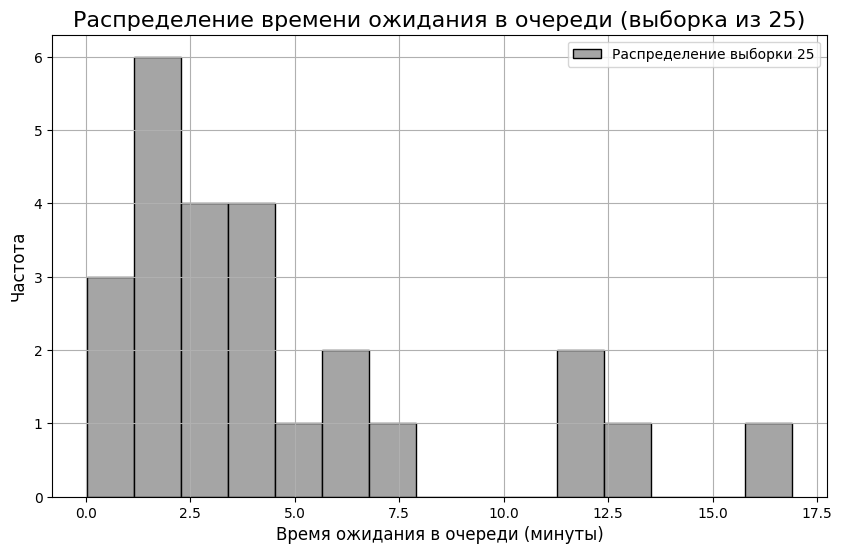

In [159]:
# Функция для перевода времени во float
def to_float(x):
   hours, minutes = map(int, x.split(':'))
   time_float = hours + minutes / 60
   return time_float

H_0 =  to_float('3:50')


# Визуализация распределения времени ожидания из выборки из 25 наблюдений

plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
plt.grid(True)  # Включаем сетку для удобства чтения графика

plt.hist(data_25, bins=15, color='#A5A5A5', edgecolor='black', label='Распределение выборки 25')


plt.title('Распределение времени ожидания в очереди (выборка из 25)', fontsize=16)
plt.xlabel('Время ожидания в очереди (минуты)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.legend()
plt.show()

## Оценка среднего при маленькой выборке
Для применения $t$-оценки предполагается, что выборка нормально распределена, особенно если она небольшая. В таких ситуациях я могу использовать два подхода:

1. **Преобразование выборки.**
Я могу преобразовать данные, чтобы привести их к нормальному распределению. Однако при небольшой выборке преобразование может оказаться недостаточно эффективным и не всегда дает желаемый результат.

2. **Использование непараметрического метода.**
Если данные не соответствуют нормальному распределению, можно применить бутстрапирование. Этот метод не требует предположений о распределении и позволяет оценить среднее значение и другие статистики независимо от формы распределения.

---

###Основная идея бутстрапирования


**Бутстрап** — это статистический метод, который используется для аппроксимации распределения статистики (например, выборочного среднего) путем создания повторных выборок с возвращением из исходных данных.

Шаги:

1. Я генерирую $n$ бутстрап-выборок из исходных данных.
2. Для каждой бутстрап-выборки вычисляю среднее значение.
4. Я формирую доверительный интервал для математического ожидания, опираясь на перцентили распределения бутстрап-оценок.
5. При уровне значимости $\alpha = 0.05$, я использую перцентили:
      - $\text{Нижний: } (\alpha/2)$
      - $\text{Верхний: } (1-\alpha/2)$


### Уровень статистической значимости
- Уровень значимости $\alpha$ определяет, какой уровень риска ошибки я готов принять, делая выводы о генеральной совокупности на основе выборочных данных.
-Я хочу построить интервал с 95%-ной вероятностью попадания в него среднего значения генеральной совокупности.

In [181]:
n_iterations = 100000
bootstrap_means = np.random.choice(data_25, size=(n_iterations, 25), replace=True).mean(axis=1)

# Вычисляем перцентили для доверительного интервала
lower_percentile, upper_percentile = np.percentile(bootstrap_means, [2.5, 97.5])

# Конвертируем в минуты и секунды
CI_lower = np.floor(lower_percentile) + (lower_percentile % 1) * 60 / 100
CI_upper = np.floor(upper_percentile) + (upper_percentile % 1) * 60 / 100


print(f"95%-й доверительный интервал для среднего в минутах: ({CI_lower:.2f}, {CI_upper:.2f})")

95%-й доверительный интервал для среднего в минутах: (3.08, 6.32)


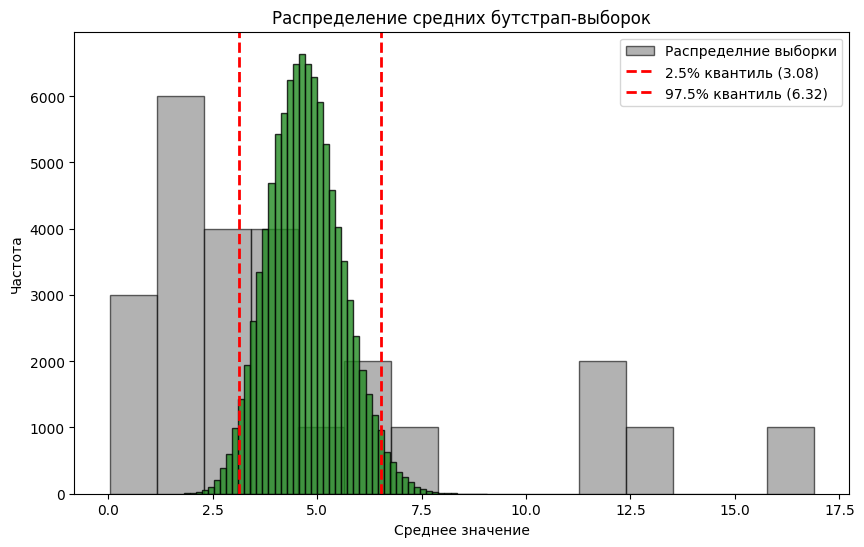

In [182]:
plt.figure(figsize=(10, 6))
plt.hist(np.repeat(data_25, 1000), bins=15, color='grey', alpha= 0.6,edgecolor='black', label='Распределние выборки')
plt.hist(bootstrap_means, bins=50, color='#228B22', edgecolor='black', alpha=0.8)
plt.axvline(lower_percentile, color='r', linestyle='dashed', linewidth=2, label=f'2.5% квантиль ({CI_lower:.2f})')
plt.axvline(upper_percentile, color='r', linestyle='dashed', linewidth=2, label=f'97.5% квантиль ({CI_upper:.2f})')
plt.title("Распределение средних бутстрап-выборок")
plt.xlabel("Среднее значение")
plt.ylabel("Частота")
plt.legend()
plt.show()

Построю QQ-график

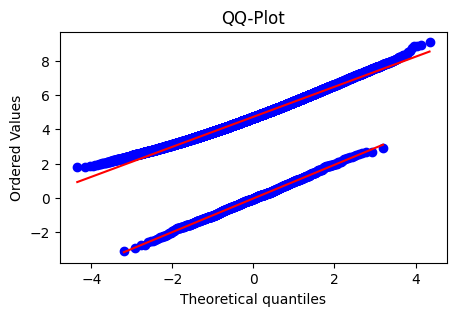

In [188]:
plt.figure(figsize=(5, 3))
stats.probplot(bootstrap_means, dist="norm", plot=plt)
stats.probplot(np.random.normal(loc=0, scale=1, size=1000), dist="norm", plot=plt) # для сравнения
plt.title('QQ-Plot')
plt.show()

Можно сделать вывод, что бутстрап-выборка имеет близкое к нормальному распределение.

## Оценка среднего при достаточно большой выборке


В моем распоряжении имеется выборка большего объёма, что позволит мне провести более точные расчёты и проверить гипотезу о среднем значении генеральной совокупности.

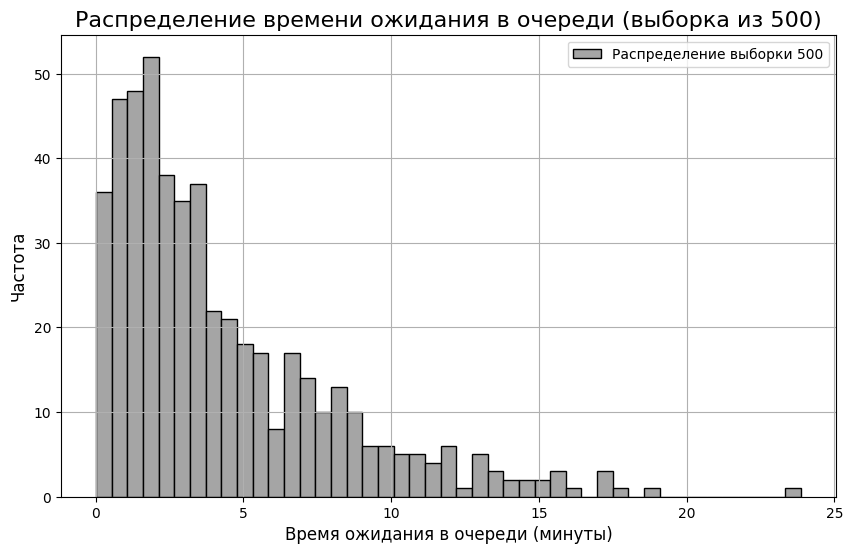

In [162]:
# Визуализация распределения времени ожидания из выборки из 500 наблюдений
plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
plt.grid(True)  # Включаем сетку для удобства чтения графика

# Строим гистограмму для выборки из 500 наблюдений
plt.hist(data_500, bins=45, color='#A5A5A5', edgecolor='black', label='Распределение выборки 500')

# Настройка заголовка и подписей осей
plt.title('Распределение времени ожидания в очереди (выборка из 500)', fontsize=16)
plt.xlabel('Время ожидания в очереди (минуты)', fontsize=12)
plt.ylabel('Частота', fontsize=12)

# Добавление легенды
plt.legend()

# Отображение графика
plt.show()

## О центральной предельной теореме

---
 Центральная предельная теорема — это фундаментальный результат в теории вероятностей, который утверждает, что при достаточном размере выборки распределение выборочного среднего будет приближаться к нормальному распределению, независимо от того, какое распределение имели исходные данные. Это позволяет применять статистические методы, основанные на нормальном распределении, даже если данные не следуют нормальному распределению.

 ---
 ### Условия применения ЦПТ:
1. **Независимость** наблюдений в выборке.
2. **Достаточный размер выборки**. Обычно рекомендуется использовать выборки размером более 30 наблюдений, но для данных с высоким уровнем вариабельности лучше использовать больше наблюдений.
3. **Конечная дисперсия** в данных.

---
###Центральная предельная теорема

Если $X_1, X_2, ..., X_n $ — независимые случайные величины с одинаковым распределением и конечной дисперсией $\sigma^2 $, то распределение среднего выборки

$$
\bar{X}_n = \frac{1}{n} \sum_{i=1}^{n} X_i
$$

сходится к нормальному распределению с параметрами:

$$
\bar{X}_n \sim N \left( \mu, \frac{\sigma^2}{n} \right)
$$

где:
- $ \mu$ — истинное среднее,
- $\sigma^2$ — дисперсия исходных данных,
- $n$ — размер выборки.



---
ЦПТ позволяет с уверенностью утверждать, что среднее по выборке будет стремиться к нормальному распределению, если размер выборки достаточно велик, что позволяет применять статистические методы, даже если распределение времени ожидания не является нормальным.

---
Использование доверительных интервалов позволяет оценить диапазон значений, в котором, с определенной вероятностью (например, 95% или 99%), находится истинное среднее время ожидания в очереди для всей генеральной совокупности. Таким образом, вместо того, чтобы измерять данные о каждом клиенте, мы можем сделать обоснованные выводы о среднем времени ожидания, основываясь на случайной выборке.

### Оценка доверительного интервала для среднего
---

$$
\bar{x} \pm z_{\frac{\alpha}{2}} \cdot \frac{s}{\sqrt{n}}
$$

где:
- $\bar{x}$ среднее значение выборки,
- $z_{\frac{\alpha}{2}}$  квантиль стандартного нормального распределения для нужного уровня значимости при $\alpha = .05$
$z = 1.96$
- $s$ — стандартное отклонение выборки,
- $n$ — размер выборки.

---

 $$\frac{s}{\sqrt{n}} = E.S.E.$$  -
 Это величина, которая оценивает, насколько выборочное среднее может отклоняться от истинного среднего генеральной совокупности. Она рассчитывается на основе данных выборки и используется, когда стандартное отклонение генеральной совокупности неизвестно.

 Она используется, чтобы определить, насколько широкий или узкий будет этот интервал вокруг выборочного среднего. Меньшая стандартная ошибка ведет к более узкому доверительному интервалу, что означает большую уверенность в точности оценки.


---

Стандатрное отклонение выборки расчитывается так:

$$
s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

где:
- $ s $ — стандартное отклонение выборки,
- $n $ — размер выборки,
- $ x_i $ — каждый элемент выборки,
- $\bar{x}$ — среднее выборки.


---

###Построение 99%-ного доверительного интервала с применением t-критерия

In [189]:
mean_500 = np.mean(data_500)
s_500 = np.std(data_500, ddof=1)
n_500 = len(data_500)
t_quant = 2.57

ESE = s_500/np.sqrt(n_500)
t_value = t_quant*ESE

print(f'Оценённая стандартная ошибка = {round(ESE,2)}')
print(f'z-статистика =  {round(t_value,2)}')


# Переводим в m.s
CI_lower = (mean_500 - t_quant * ESE)//1+(round((mean_500 - t_quant * ESE)%((mean_500 - t_quant * ESE)//1)*60)/100)
CI_upper = (mean_500 + t_quant * ESE)+(round((mean_500 + t_quant * ESE)%((mean_500 + t_quant * ESE)//1)*60)/100)

print('----------------------')
print(f'Доверительный интервал для среднего времени в минутах: ({round(CI_lower, 2)}, {round(CI_upper, 2)})')

Оценённая стандартная ошибка = 0.17
z-статистика =  0.44
----------------------
Доверительный интервал для среднего времени в минутах: (3.52, 5.18)


На основании выборки из 500 значений, можно с 99%-ной уверенностью утверждать, что среднее время ожидания находится в диапазоне от 3.52 до 5.18 минут.

### Проведение одностороннего t-теста.

Односторонний $t$-тест — это статистический тест, который проверяет, значительно ли отличается среднее выборки от заданного гипотетического значения в одном направлении (либо больше, либо меньше).

$$t = \frac{x̄ - μ₀}{\frac{s} {√n}}$$


где:
- $x̄$ — выборочное среднее,
- $μ₀$ — гипотетическое значение среднего,
- $s$ — стандартное отклонение выборки,
- $n$ — размер выборки.

Гипотезы для одностороннего теста:
- **H₀**: μ = μ₀ (нулевая гипотеза),
- **H₁**: μ > μ₀ (альтернативная гипотеза).

Результат t-статистики сравнивается с критическим значением из t-распределения для заданного уровня значимости α.

---


In [164]:
s_500 = np.std(data_500, ddof=1)  # Стандартное отклонение выборки
n_500 = len(data_500)

ESE = s_500/np.sqrt(n_500)
t_emp = (mean_500-H_0)/ESE
t_theor = 1.96 # по таблице


alpha = 0.05
t_stat, p_value = stats.ttest_1samp(data_500, H_0)

print(f'P-value = {p_value:.2f}')
print(f't-статистика: {t_emp:.2f}')
print('')
if abs(t_emp) > t_theor:
    print(f"Отклоняем нулевую гипотезу: среднее больше, чем 3:50")
else:
    print("Нет оснований отклонять нулевую гипотезу")

P-value = 0.01
t-статистика: 2.74

Отклоняем нулевую гипотезу: среднее больше, чем 3:50


## Мощность статистического теста

Мощность теста показывает, насколько хорошо статистический тест может обнаружить реальный эффект (например, разницу между группами или отклонение от гипотезы), если этот эффект действительно существует.

- В нашем случае мощность теста определяется как доля случаев, когда нулевая гипотеза была отклонена (в отличие от того, что она была истинной).

Как правило, перед проведением исследования определяют мощность теста, чтобы установить размер выборки.

---
**Интуитивный пример:**
- Высокая мощность теста (например, 0.8 или 80%): Если эффект существует, тест правильно его обнаружит в 80% случаев.
- Низкая мощность теста (например, 0.3 или 30%): Даже если эффект существует, вы "заметите" его только в 30% случаев. Это почти как бросание монетки.

In [179]:
reject_null = []
for _ in range(10000):
  sample = np.random.choice(data_25, size=len(data_25), replace=True)
  _, p_value = stats.ttest_1samp(sample, H_0)
  if p_value < 0.05:
    reject_null.append(1)
  else:
    reject_null.append(0)

power = np.mean(reject_null)
print(f"Мощность теста (бутстрап): {power:.2f}")

Мощность теста (бутстрап): 0.11


In [178]:
reject_null = []
for _ in range(10000):
  sample = np.random.exponential(np.mean(data_500), len(data_500))
  _, p_value = stats.ttest_1samp(sample, 3.77)
  if p_value < .05:
    reject_null.append(1)
  else:
    reject_null.append(0)

power = np.mean(reject_null)
print(f"Мощность теста: {power:.2f}")

Мощность теста: 0.81


In [190]:
reject_null = []
for _ in range(10000):
  sample = np.random.exponential(np.mean(data_25), len(data_25))
  _, p_value = stats.ttest_1samp(sample, 3.77)
  if p_value < .05:
    reject_null.append(1)
  else:
    reject_null.append(0)

power = np.mean(reject_null)
print(f"Мощность теста: {power:.2f}")

Мощность теста: 0.10


###Выводы:

1. Размер выборки играет ключевую роль в мощности статистических тестов. Небольшая выборка (25 наблюдений) показала низкую мощность, что затрудняет выявление статистически значимых отклонений.

2. Увеличение размера выборки до 500 наблюдений значительно повышает мощность теста, делая выводы более надежными и уменьшает риск ошибки второго рода.

3. Для более точного тестирования гипотез в условиях экспоненциального распределения данных, важно учитывать размер выборки.